# HW2  Regression Fun Time!
## Due Saturday Oct 16th, 2021 at Midnight

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. 

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

Q1) [10 points] Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [2]:
def model(x,w):
    # create row of ones to multiply by bias term
    new_row = np.ones(x.shape[1])
    # append row to x's
    x_o = np.vstack((new_row,x))
    # calculate linear combination of x and w
    y_predicted = np.array(x_o.T@w)
    return y_predicted

Q2) [10 ponts] Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [3]:
def least_squares(w,x,y):
    # get vector of predicted values
    y_pred = model(x,w)
    # find the difference between actual and predicted values
    difference_array = np.subtract(y_pred, y)
    # square those differences
    squared_array = np.square(difference_array)
    # sum them and divide by number of elements
    cost = squared_array.mean()
    return cost

Q3) [5 point] This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [4]:
def gradient_descent(g,alpha,max_its,w,x,y):
    # find gradient of function
    gradient = grad(g)
    # empty lists for cost history and weight history
    cost_history = []
    weight_history = []
    w=w.copy()
    # loop over iterations
    for k in range(max_its):
        # calculate cost
        cost = g(w,x,y)
        # add to cost history
        cost_history.append(cost)
        # add weight to weight history
        weight_history.append(w)
        # update weight according to cost and learning rate
        w -= alpha*gradient(w,x,y)
    # return cost history
    return weight_history, cost_history

Q4) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [5]:
# import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])

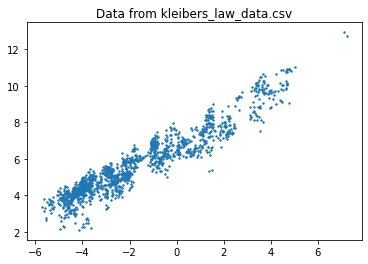

In [6]:
# plot a scatter plot of the data
plt.scatter(x,y,s=2)
plt.title("Data from kleibers_law_data.csv")
plt.show()

Q5) [5 points] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

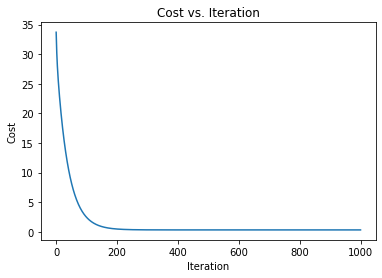

In [7]:
# define the initial weight, max iterations, and learning rate
w = np.array([random.uniform(-0.1,0.1),random.uniform(-0.1,0.1)])
max_its=1000
alpha=0.01

# run gradient descent to get the weight and cost history
weight_history, cost_history = gradient_descent(least_squares,alpha,max_its,w,x,y)

plt.plot(range(max_its),cost_history)
plt.title("Cost vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

Q6) [5 points] Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4. 


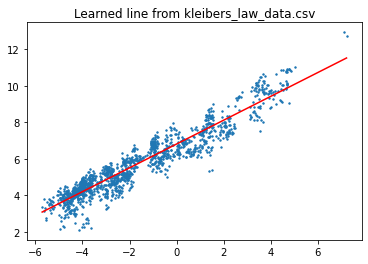

In [8]:
# generate x's for plotting
s = np.linspace(np.min(x),np.max(x))

# find the minimum cost and associated weights
min_index = cost_history.index(min(cost_history))
w0 = weight_history[min_index][0]
w1 = weight_history[min_index][1]

# plot the data points and learned line
plt.plot(s,(w0+w1*s), color='r')
plt.scatter(x,y,s=2)
plt.title("Learned line from kleibers_law_data.csv")
plt.show()

Q7) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y). 

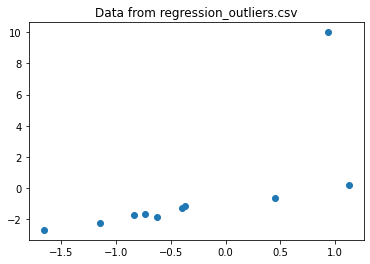

In [9]:
# load in dataset
data = np.loadtxt('regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

plt.scatter(x,y)
plt.title("Data from regression_outliers.csv")
plt.show()

Q8) [10 ponts] Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [10]:
def least_absolute_deviations(w,x,y):
    # get vector of predicted values
    y_pred = model(x,w)
    # find the difference between actual and predicted values
    difference_array = np.subtract(y_pred, y)
    # get the absolute value of those differences
    abs_array = np.abs(difference_array)
    # sum them and divide by number of elements
    cost = abs_array.mean()
    return cost

Q9) [5 points] Use the gradient descent function twice to learn two linear models using the new x and y from Q7 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


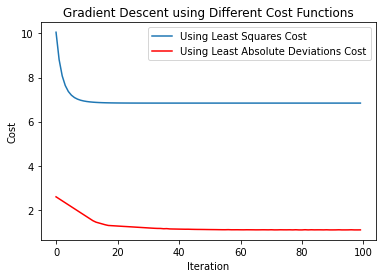

In [11]:
# define the initial weight, max iterations, and learning rate
w = np.array([1.0,1.0])
max_its = 100
alpha = 0.1

# generate weight and cost history for gradient descent with different cost functions
weight_history1, cost_history1 = gradient_descent(least_squares,alpha,max_its,w,x,y)
weight_history2, cost_history2 = gradient_descent(least_absolute_deviations,alpha,max_its,w,x,y)

# plot the cost
plt.plot(range(max_its), cost_history1, label='Using Least Squares Cost')
plt.plot(range(max_its), cost_history2, color = 'r', label='Using Least Absolute Deviations Cost')
plt.title("Gradient Descent using Different Cost Functions")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

Q10) [5 points] Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you? 


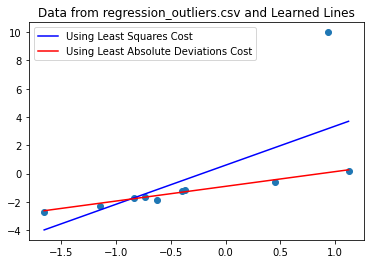

In [12]:
# generate x's for plotting
s = np.linspace(np.min(x),np.max(x))

# plot data
plt.scatter(x,y)

# find the minimum cost and associated weights for both cost functions
min_index = cost_history1.index(min(cost_history1))
w0_ls = weight_history1[min_index][0]
w1_ls = weight_history1[min_index][1]

min_index = cost_history2.index(min(cost_history2))
w0_lad = weight_history2[min_index][0]
w1_lad = weight_history2[min_index][1]

# plot the data and learned lines for both cost functions
plt.plot(s,(w0_ls+w1_ls*s), color='b',label='Using Least Squares Cost')
plt.plot(s,(w0_lad+w1_lad*s), color='r',label='Using Least Absolute Deviations Cost')
plt.legend()
plt.title("Data from regression_outliers.csv and Learned Lines")
plt.show()

The line using the least absolute deviations cost function seems to be a better fit.

Q11) [6 points] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [13]:
def MSE(y_actual,y_pred):
    # find the difference between the predicted and actual output values
    difference_array = np.subtract(y_pred, y)
    # square these differences
    squared_array = np.square(difference_array)
    # average these squares
    error = squared_array.mean()
    return error

def MAD(y_actual,y_pred):
    # find the difference between the predicted and actual output values
    difference_array = np.subtract(y_pred, y)
    # take the absolute value of these differences
    abs_array = np.abs(difference_array)
    # average these values
    error = abs_array.mean()
    return error

Q12) [4 points] Use the functions above to report the MSE and MAD for the two models learned in Q9, using the x and y from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [14]:
weights_ls = np.array([w0_ls,w1_ls])
y_pred_ls = model(x,weights_ls)
print("MSE for Model Using Least Squares Cost", MSE(y,y_pred_ls))
print("MAD for Model Using Least Squares Cost", MAD(y,y_pred_ls), "\n")

weights_lad = np.array([w0_lad,w1_lad])
y_pred_lad = model(x,weights_lad)
print("MSE for Model Using Least Absolute Deviations Cost", MSE(y,y_pred_lad))
print("MAD for Model Using Least Absolute Deviations Cost", MAD(y,y_pred_lad))

MSE for Model Using Least Squares Cost 6.841394300667753
MAD for Model Using Least Squares Cost 1.68937055338514 

MSE for Model Using Least Absolute Deviations Cost 9.866874898545982
MAD for Model Using Least Absolute Deviations Cost 1.09670195220381


The model using least absolute deviations cost is performing better according to MAD, but performing worse according to MSE. Visually, this model is performing better because it matches most of the points very closely. This is because the least absolute deviation penalizes the model less for outlying points.

Q13) [6 points] Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [15]:
def L2_regularizer(w):
    # square the weights
    squared_matrix = np.square(w)
    # add them together
    L2 = np.sum(w)
    return L2

def L1_regularizer(w):
    # add the weights together
    L1 = np.sum(w)
    return L1

Q14) [12 points] Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q13. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [16]:
def ridge(w,x,y,lmbda):   
    # perform least squares, then add lambda * L2 regularizer
    cost = least_squares(w,x,y) + lmda*L2_regularizer(w)
    return cost

def lasso(w,x,y,lmbda):
    # perform least squares, then add lambda * L1 regularizer
    cost = least_squares(w,x,y) + lmda*L1_regularizer(w)
    return cost

# The rest of the questions are for bonus points, but highly recommended

Q15) [2 points] The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [17]:
csvname = 'weatherHistory.csv'
# load in the data, excluding the first row
data = np.loadtxt(csvname,delimiter=',',dtype=str,skiprows=1)

Q16) [5 points] Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [18]:
# index into data to pull out desired columns, and convert data type to float
y = np.array(data[:,3],dtype='float')
x = np.array(data[:,[4,5,6,7,8,10]],dtype='float')

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression() 

linearModel.fit(x_train, y_train)

Q17) [2 points] Use the train_test_split to divide your modified data from Q16 into 80% train, 20% test. 

In [24]:
# split the data into 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Q18) [10 points] Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [21]:
from sklearn.metrics import mean_squared_error

# fit a linear model to the training data
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# predict output for test values
y_pred = linearModel.predict(x_test)

# calculate MSE for predictions on test data
print("Mean squared error:", mean_squared_error(y_test, y_pred))

Mean squared error: 0.8796128455486873


Q19) [10 points] Repeat Q18 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [22]:
# fit ridge and lasso models to training data
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

# predict output for test values
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

# calculate MSE for predictions on test data
print("Mean squared error for Lasso:", mean_squared_error(y_test, y_pred_lasso))
print("Mean squared error for Ridge:", mean_squared_error(y_test, y_pred_ridge))

Mean squared error for Lasso: 0.9589489831444922
Mean squared error for Ridge: 0.8796117232822241


Q20) [4 points] Print the learned parameters for the Ridge and Lasso models (using .coef_).  Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [23]:
# print learned weights for both models
print("Learned weights for Lasso:", lasso.coef_)
print("Learned weights for Ridge:", ridge.coef_)

Learned weights for Lasso: [ 8.80574851e-01 -0.00000000e+00  6.84851956e-02 -2.48645720e-04
  0.00000000e+00 -1.39879582e-04]
Learned weights for Ridge: [ 8.72824975e-01 -1.42907743e+00  7.93674814e-02 -3.98324798e-04
  7.73851560e-03 -1.92049051e-04]


Ridge seemed to make some parameter values very small (causing their associated features to have almost no bearing on the cost function), while lasso eliminated those weights entirely by setting some parameters to 0. Namely, lasso eliminated humidity and visibility.